In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# from NewsSentiment import TargetSentimentClassifier
from scipy.signal import savgol_filter


In [10]:
# tsc = TargetSentimentClassifier()
# tsc.infer_from_text("i hate trump", "trump")

In [16]:
cnn = pd.read_csv('../data/output_data/trump_cnn_news_sentiment.csv')
fox = pd.read_csv('../data/output_data/trump_fox_news_sentiment.csv')


In [12]:
worst_precentile = cnn.compound_s.quantile(0.1)
best_precentile = cnn.compound_s.quantile(0.9)
print("worst_precentile (10%): ", worst_precentile, ". best_precentile (10%): ", best_precentile)

best_precentile = cnn.compound_s.quantile(0.95)
print("best_precentile (5%): ", best_precentile)

cnn[cnn.compound_s < worst_precentile].loc[:, ('title', 'compound_s')].values

worst_precentile (10%):  -0.935127041369704 . best_precentile (10%):  0.44050054121948823
best_precentile (5%):  0.5569118221147403


array([['Colorado discipline office moves toward ethics complaint against ex-Trump attorney for 2020 election gambits',
        -0.9999999679806376],
       ['Paul Ryan grilled for remaining on Fox board of directors amid election fraud revelations',
        -1.0],
       ["Fox executives should be fired for 'proven misconduct' exposed in Dominion lawsuit, renowned Yale professor says",
        -1.0],
       ["Fox faces an 'existential threat' from its multibillion-dollar defamation cases",
        -0.9999952319679636],
       ["Opinion: Tim Scott's pitch to Republicans offers more than the usual red meat",
        -0.9530211889494016],
       ['Media organizations ask Congress for access to January 6 footage',
        -0.9705882352941176],
       ['Judge tosses out disciplinary action against Sidney Powell for work on Trump election reversal bid',
        -0.9968102449436784],
       ['Federal prosecutors seek to compel Pence to testify in special counsel probe',
        -0.9999999999

In [13]:
cnn[cnn.compound_s > best_precentile].loc[:, ('title', 'compound_s')].values

array([['White House releases ambitious cyber strategy calling for more regulation of vulnerable sectors',
        0.8771875345562102],
       ["Opinion: Who's stopping the government from giving Americans relief from crushing student loans",
        0.6485590542192611],
       ['The fastest growing metro in the US is looking to a shrinking reservoir to keep the boom going',
        0.6584496118870106],
       ['Rep. Elissa Slotkin entering race to succeed retiring Michigan Democratic Sen. Debbie Stabenow',
        0.9619421447498048],
       ["Buttigieg says he'll visit East Palestine 'when the time is right,' lays out new rail safety efforts",
        0.9510170803680182]], dtype=object)

In [14]:
def add_label(row):
    labels = {row['neg_s']: 'Negative', row['pos_s']:'Positive', row['neu_s']:'Neutral'}
    max_val = max(labels.keys())
    row['label'] = labels[max_val]
    row[labels[max_val]] = 1
    labels.pop(max_val)
    for key in labels.keys():
        row[labels[key]] = 0
    return row

cnn = cnn.apply(add_label, axis=1)
fox = fox.apply(add_label, axis=1)

    
    

In [8]:
def date_from_recet_only(df):
    df.date = [pd.to_datetime(date).strftime("%Y-%m-%d") for date in df.date]
    df = df[df['date'] > '2022-11-01']
    df = df.sort_values(by='date')
    return df

cnn = date_from_recet_only(cnn)
fox = date_from_recet_only(fox)

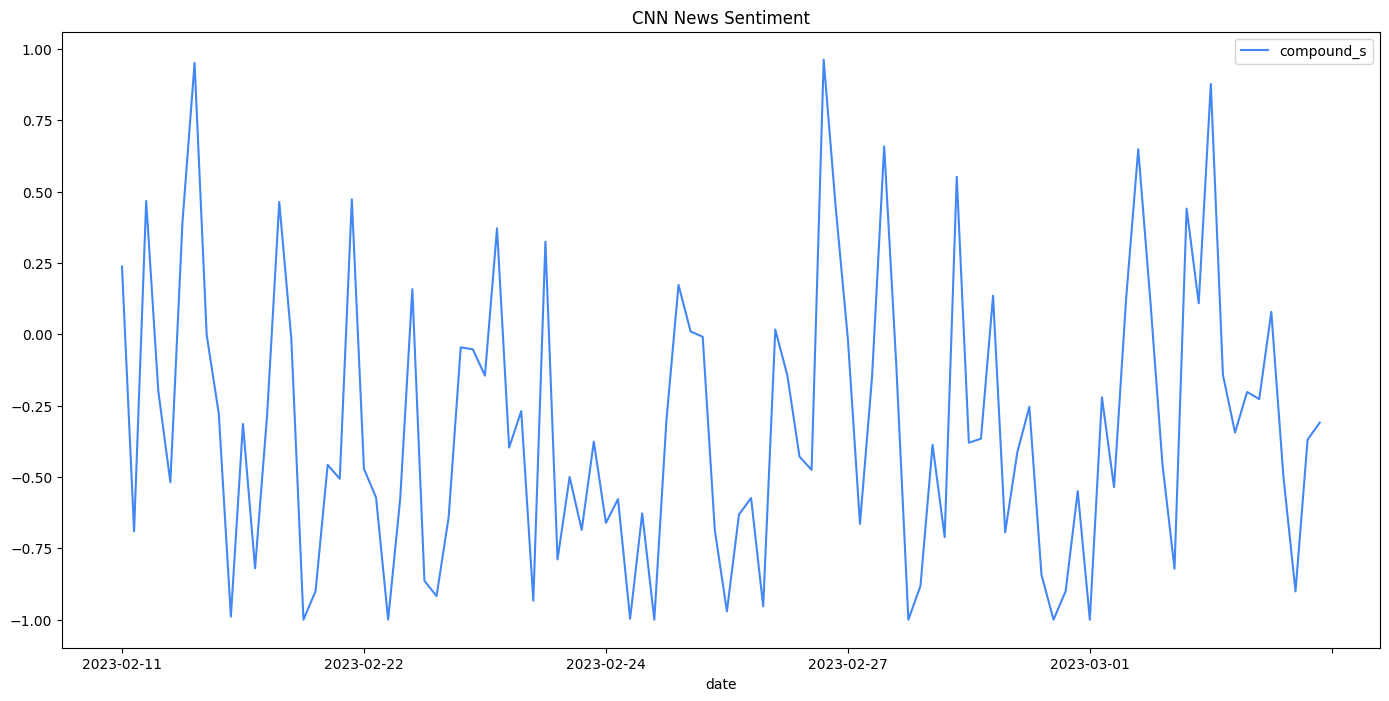

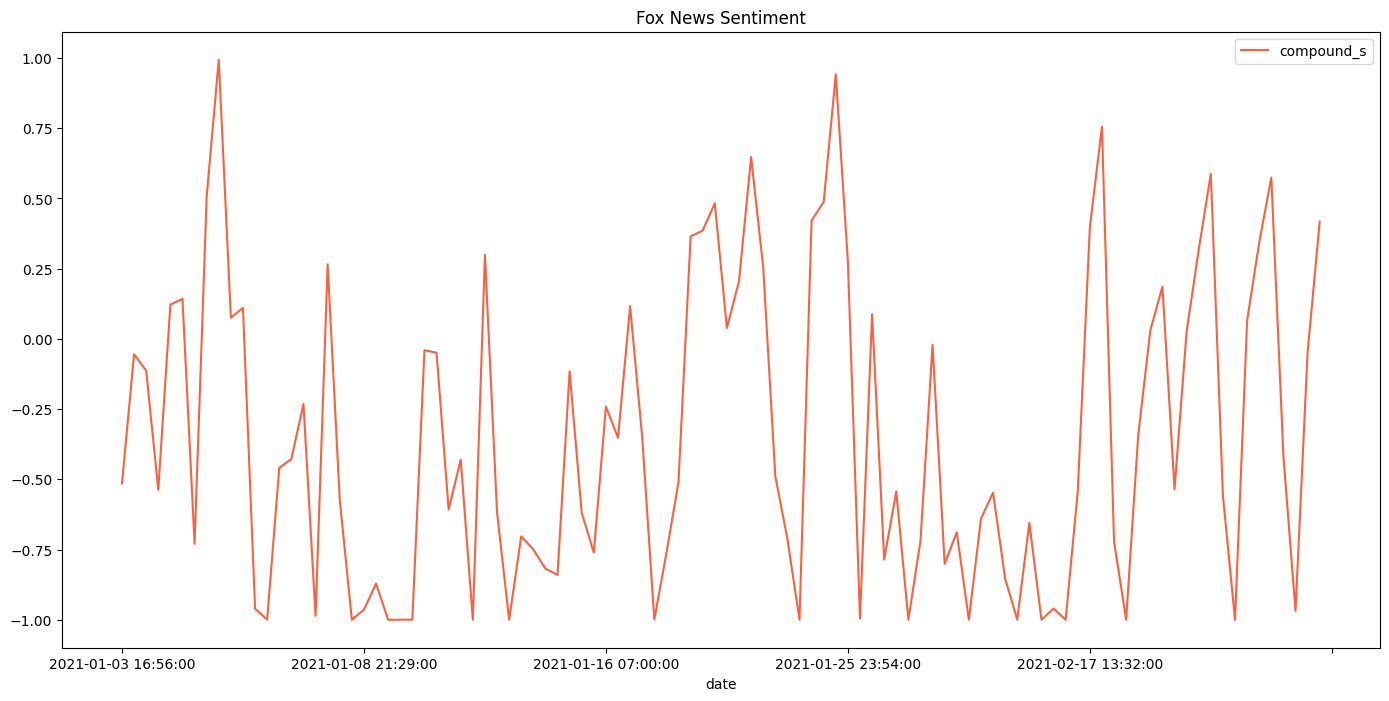

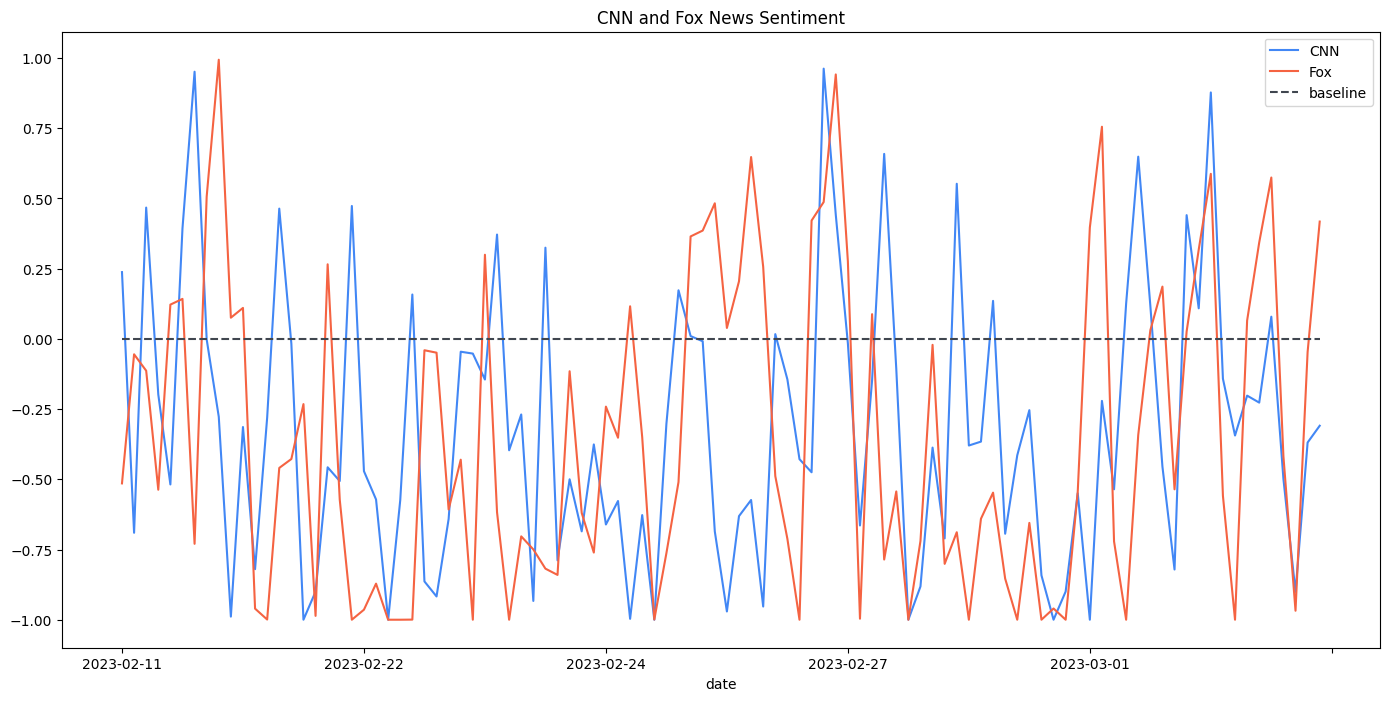

In [17]:
def plot(df:pd.DataFrame, vendor, color='#4287f5'):
    df = df.sort_values(by=['date'])
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8), color=color)


def joined_plot(df1:pd.DataFrame, df2:pd.DataFrame, vendor1, vendor2, color1='#4287f5', color2='#f56342'):    
    df1 = df1.sort_values(by=['date']).rename(columns={'compound_s': vendor1})
    df2 = df2.sort_values(by=['date']).rename(columns={'compound_s': vendor2})
    
    axes = df1.plot(x='date', y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', color=color1 , figsize=(17,8))
    df2.plot(x='date', y=vendor2, kind='line', ax=axes, color=color2)
    df3 = pd.DataFrame({'date': df1.date, 'baseline': [0.0]*len(df1)}).plot(x='date', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

plot(cnn, 'CNN')
plot(fox, 'Fox', color='#f56342')
joined_plot(cnn, fox, 'CNN', 'Fox')

/tmp/ipykernel_958/1023225465.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week.astype(str) + '-' + df['date'].dt.year.astype(str)
/tmp/ipykernel_958/1023225465.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))
/tmp/ipykernel_958/1023225465.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week.astype(str) + '-' + df['date'].dt.year.astype(str)
/tmp/ipykernel_958/1023225465.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is de

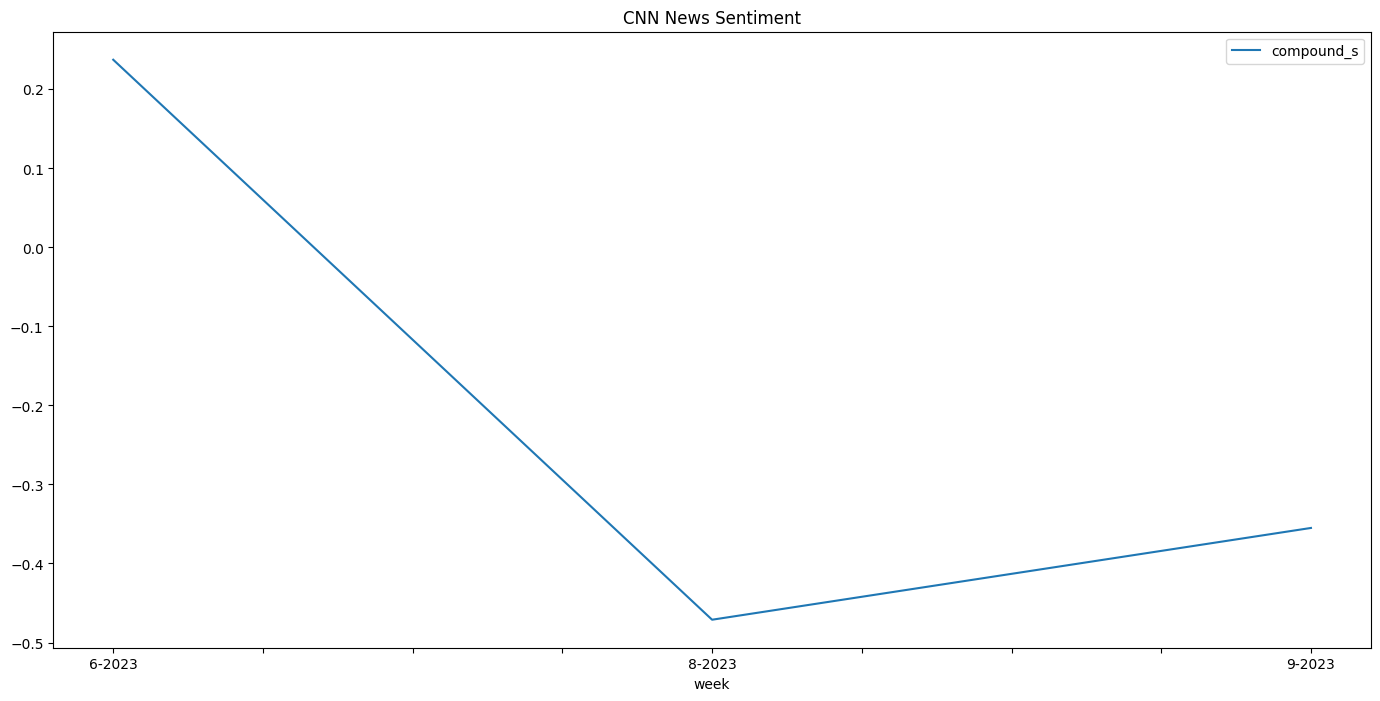

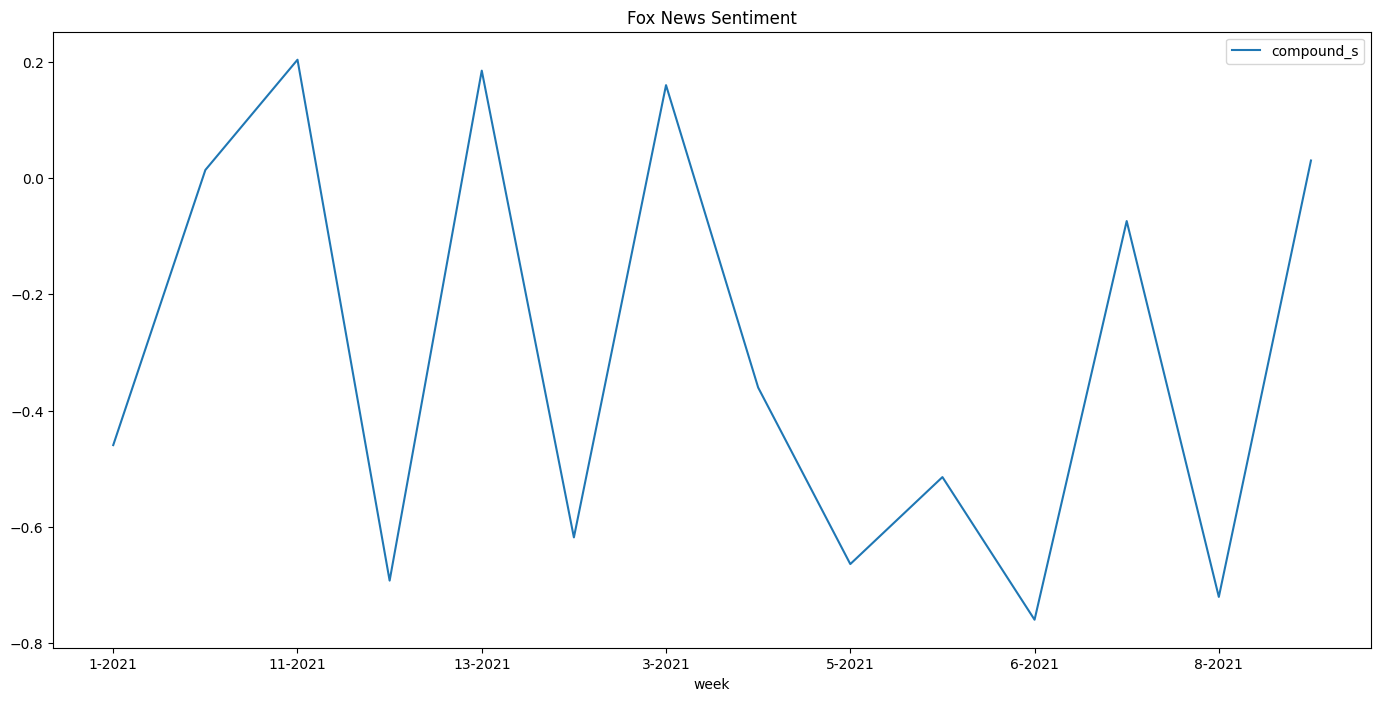

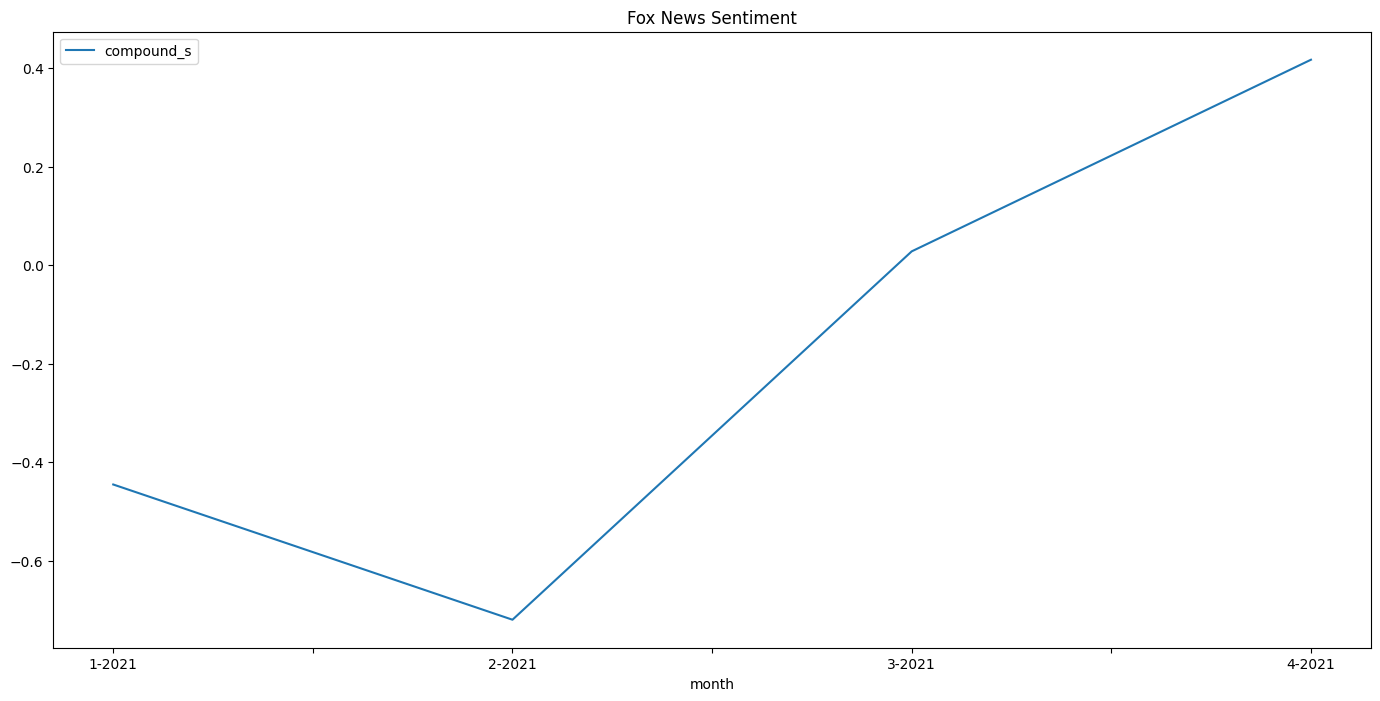

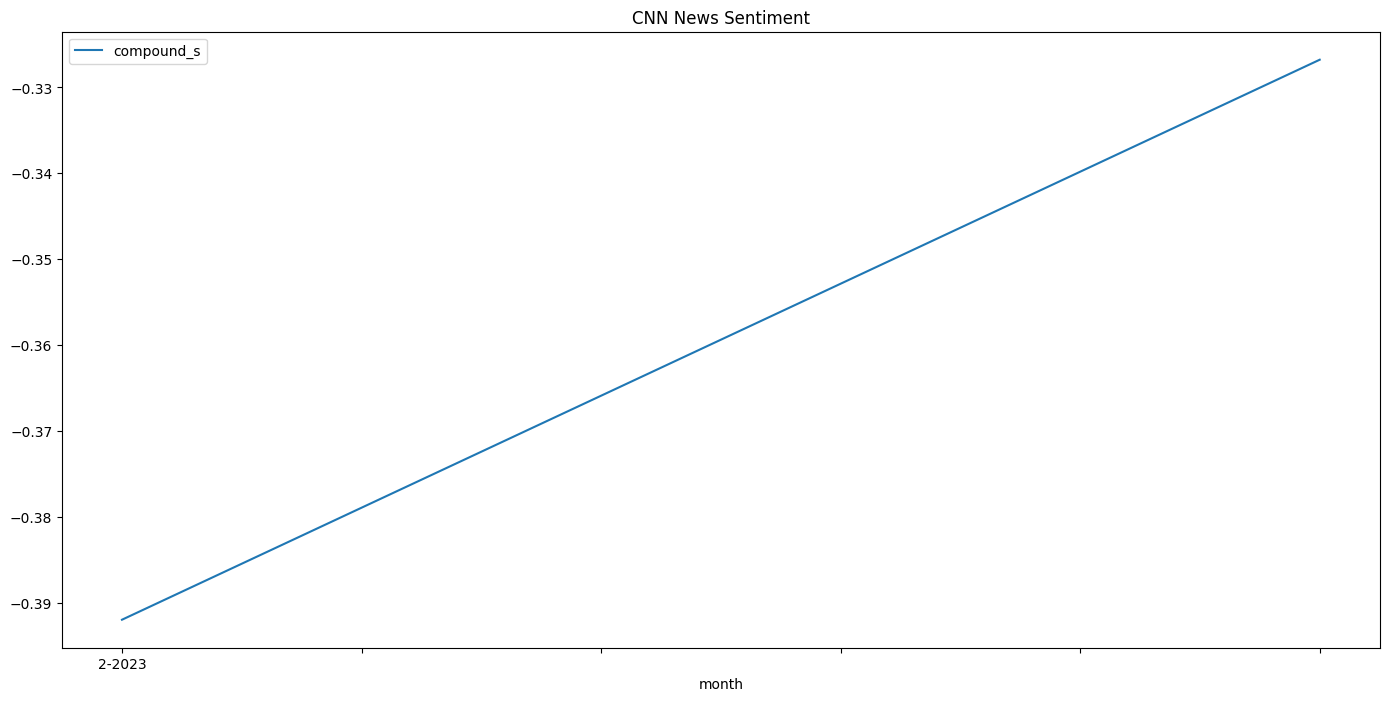

In [27]:
def weekly_avg_plot(df:pd.DataFrame, vendor):
    
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.week.astype(str) + '-' + df['date'].dt.year.astype(str)
    df = df.sort_values(by=['week'], ascending=False)
    df.groupby('week').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

def monthly_avg_plot(df:pd.DataFrame, vendor):
        
        df['date'] = pd.to_datetime(df['date'])
        df['month'] = df['date'].dt.month.astype(str) + '-' + df['date'].dt.year.astype(str)
        df = df.sort_values(by=['month'], ascending=False)
        df.groupby('month').median().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

weekly_avg_plot(cnn, 'CNN')
weekly_avg_plot(fox, 'Fox')
monthly_avg_plot(fox, 'Fox')
monthly_avg_plot(cnn, 'CNN')

In [24]:
fox.date.value_counts()

2021-01-06 14:44:00    1
2021-02-13 18:20:00    1
2021-02-10 09:56:00    1
2021-02-17 13:32:00    1
2021-02-04 12:52:00    1
                      ..
2021-01-08 23:22:00    1
2021-01-07 11:12:00    1
2021-01-18 21:03:00    1
2021-01-06 12:32:00    1
2021-03-15 14:33:00    1
Name: date, Length: 100, dtype: int64

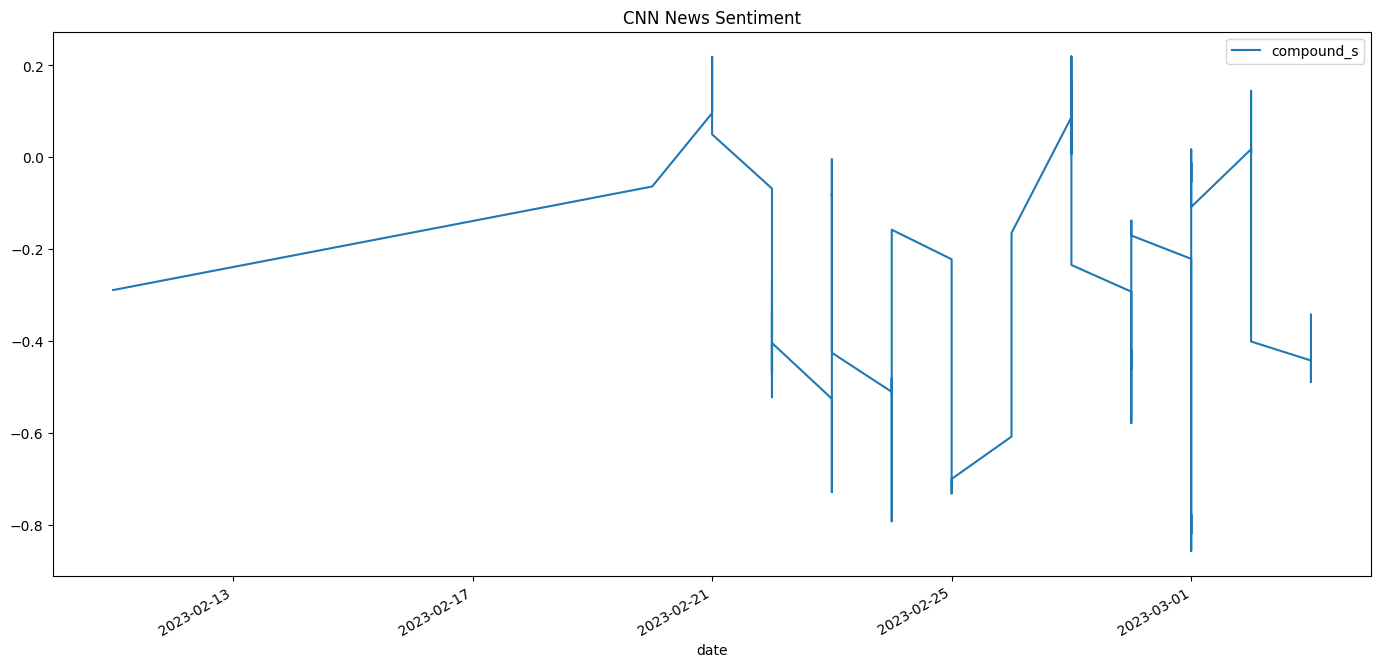

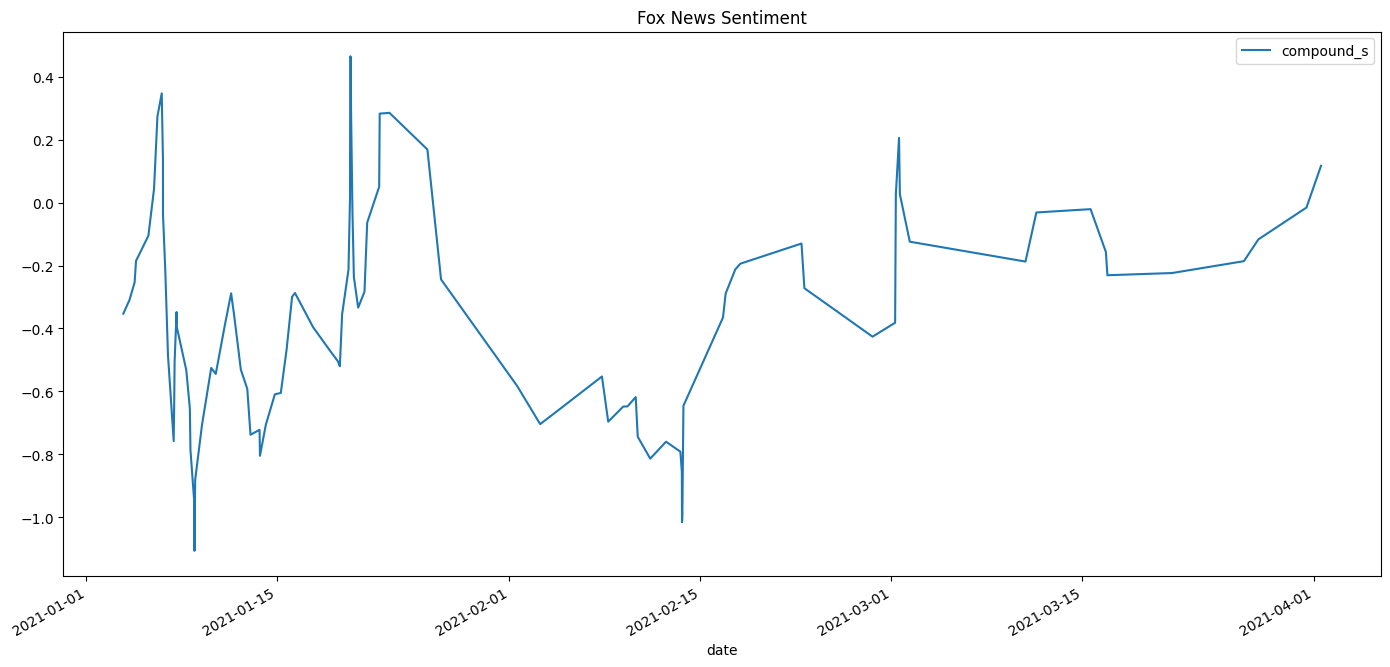

In [21]:
def plot_smooth(df:pd.DataFrame, vendor):
    df = df.sort_values(by=['date'])
    df['compound_s'] = savgol_filter(df['compound_s'], 10, 2)
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_smooth(cnn, 'CNN')
plot_smooth(fox, 'Fox')

In [118]:
cnn = pd.read_csv('netanyahu_cnn_news_sentiment_lbl.csv')

,title,date,pos,neg,neu,index
0,"About 160,000 people protest against Netanyahu...",2023-02-26,0,1,0,0.0
1,11 Palestinians killed during Israeli raid tar...,2023-02-22,0,0,1,1.0
2,Your flight from Israel might be about to get ...,2023-02-23,0,0,1,2.0
3,Israel launches airstrikes on Gaza after rocke...,2023-02-23,0,0,1,3.0
4,Opinion: Netanyahu's 'reforms' are threatening...,2023-02-21,0,0,1,4.0
...,...,...,...,...,...,...
95,A single sentence that perfectly captures the ...,2021-12-10,0,0,1,95.0
96,Don't count on an end to the Joe Biden-Naftali...,2021-11-08,0,1,0,96.0
97,"Israel doubles down against US, saying there i...",2021-11-07,0,1,0,97.0
98,Trump's inner circle takes a trip down memory ...,2021-10-12,0,0,1,98.0


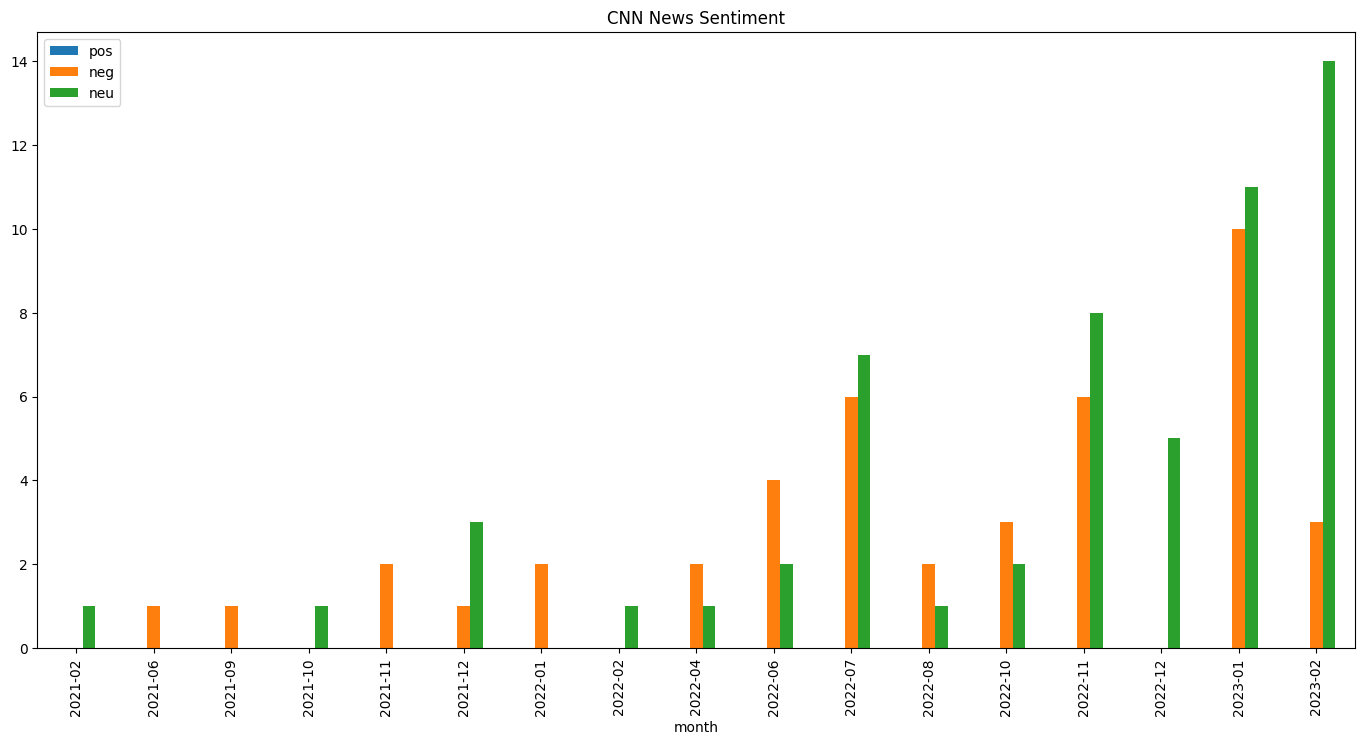

In [127]:
def add_month(row):
    row['month'] = row['date'].split('-')[0] + '-' + row['date'].split('-')[1]
    return row

# cnn = cnn.apply(add_month, axis=1)

def plot_counts(df:pd.DataFrame, vendor):

    df = df.apply(add_month, axis=1)
    df = df.sort_values(by=['month'])
    df.groupby('month').agg({'pos':'sum', 'neg':'sum', 'neu':'sum'}).plot(kind='bar', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_counts(cnn, 'CNN')
# cnn

In [71]:
fox[cnn.month == '2021-12']

,Negative,Neutral,Positive,compound,compound_s,date,index,label,neg,neg_s,neu,neu_s,pos,pos_s,title,month
92,0.0,1,0.0,0,0.298789,2022-12-06 18:11:00,92.0,Neutral,0,0.162738,0,0.481707,0,0.355554,Larry Kudlow: Former Israel Prime Minister Ben...,2022-12
93,0.0,1,0.0,0,0.482590,2022-12-21 20:34:00,93.0,Neutral,0,0.117818,0,0.497002,0,0.385180,Incoming Israeli Prime Minister Netanyahu says...,2022-12
94,0.0,1,0.0,0,0.080647,2022-11-30 12:00:00,94.0,Neutral,0,0.179170,0,0.634679,0,0.186151,Netanyahu: Iran nuclear deal is 'probably dead...,2022-11
95,0.0,1,0.0,0,-0.129687,2022-12-04 15:14:00,95.0,Neutral,0,0.299839,0,0.526410,0,0.173750,Netanyahu insists he won't step on 'landmine' ...,2022-12
